
Ensamble on Benignant v Malignant classifiers:

- Scratch
- Vgg16
- Inception v3

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd "/content/drive/MyDrive/CI/"

/content/drive/.shortcut-targets-by-id/1fPndHe31Mko5g75JKSEcrswLjQvUYExS/CI


In [ ]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=b78cbddd94b4057585de34bc08007c0525eb12765cc937785bd402c13c8a9d40
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
import import_ipynb
import utility
from sklearn import metrics
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,fbeta_score

data_path='/content/drive/MyDrive/CI/numpy_data/'
model_path='/content/drive/MyDrive/CI/models/'

# check hardware acceleration
device_name = tf.test.gpu_device_name()
print('GPU: ', device_name)

importing Jupyter notebook from utility.ipynb
GPU:  /device:GPU:0


TEST SET GENERATION

In [ ]:
def contrast(images):
  images = np.expand_dims(images, -1)
  contrast_img = []
  for elem in images:
    contrast_img.append(tf.image.adjust_contrast(elem, 1.5))
 
  contrast_img=np.array(contrast_img)
  contrast_img=np.squeeze(contrast_img, axis=-1)


  plt.imshow(np.squeeze(images, axis=-1)[0], cmap='gray')
  #plt.title('before contrast')
  plt.show()
  plt.imshow(contrast_img[0], cmap='gray')
  #plt.title('after contrast')
  plt.show()

  return contrast_img

(336,)


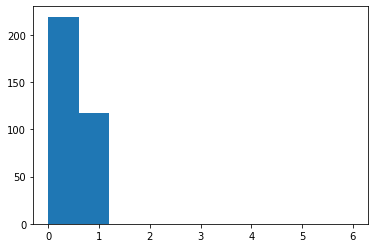

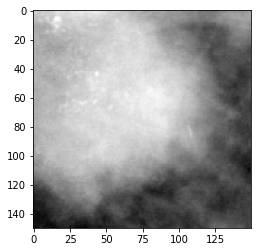

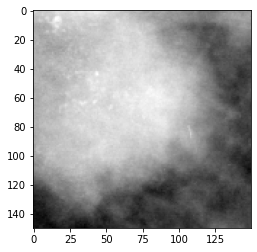

In [ ]:
test_images, test_labels= utility.load_test()
test_bm_imgs,test_bm_labels = utility.benignant_malignant_training_set_building(test_images, test_labels)

print(test_bm_labels.shape)

plt.hist(test_bm_labels,range=(0,6) )
plt.show()

test_bm_imgs=contrast(test_bm_imgs)

test_set = test_bm_imgs/65536
test_set = np.expand_dims(test_set, -1)

In [ ]:
BATCH_SIZE=32

model1 = tf.keras.models.load_model(model_path + 'BM_SCRATCH.h5')
model2 = tf.keras.models.load_model(model_path + 'BM_PRETRAINED_INCEPTION.h5')
model3 = tf.keras.models.load_model(model_path + 'BM_VGG.h5')


predictions1= model1.predict(test_set, batch_size=BATCH_SIZE, verbose=1)
predictions2= model2.predict(test_set, batch_size=BATCH_SIZE, verbose=1)
predictions3= model3.predict(test_set, batch_size=BATCH_SIZE, verbose=1)

11/11 [==============================] - 1s 61ms/step


In [ ]:
print(predictions1.shape)
predictions1=np.squeeze(predictions1, axis=-1)
predictions2=np.squeeze(predictions2, axis=-1)
predictions3=np.squeeze(predictions3, axis=-1)
print(predictions1.shape)

#create a 3 rows multidim array
predictions = np.array([predictions1, predictions2, predictions3])

print(f' predictions:\n {predictions[:,:10]}')
print(predictions.shape)

#compute the mean along the 0 axis (on the rows)
mean_predictions = predictions.mean(axis=0)
print(f'averaged predictions:\n {mean_predictions[0:10]}')

(336, 1)
(336,)
 predictions:
 [[0.519933   0.6342658  0.23325336 0.19964008 0.5317744  0.61312914
  0.2973986  0.6556687  0.36639476 0.30427504]
 [0.9742619  0.8956742  0.86942077 0.65144604 0.7671074  0.44132397
  0.75248355 0.9763738  0.3833824  0.6739653 ]
 [0.619623   0.72819984 0.4038662  0.36073896 0.66478974 0.7467288
  0.57578963 0.6950169  0.27407178 0.60820216]]
(3, 336)
averaged predictions:
 [0.704606   0.75271326 0.5021801  0.40394172 0.65455717 0.60039395
 0.5418906  0.77568644 0.341283   0.52881414]


Confusion matrix:
 [[155  64]
 [ 32  85]]

accuracy:
 0.7142857142857143

f2:
 0.6888168557536466

report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.76       219
           1       0.57      0.73      0.64       117

    accuracy                           0.71       336
   macro avg       0.70      0.72      0.70       336
weighted avg       0.74      0.71      0.72       336

AUC:
 0.7171291417866761


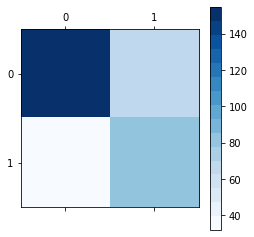

(0.7171291417866761, array([[155,  64],
        [ 32,  85]]), 0.7142857142857143, 0.6888168557536466)

In [ ]:
mean_predictions = np.expand_dims(mean_predictions, -1)
utility.do_evaluations(mean_predictions, test_bm_labels)

## Contest

X test abno: 336


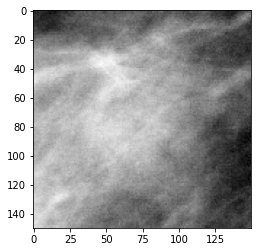

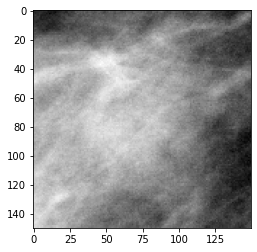

11/11 [==============================] - 1s 65ms/step
(336, 1)
(336,)
 predictions:
 [[0.2956625  0.24247783 0.22786486 0.25801855 0.25523505 0.57598525
  0.51121175 0.35496905 0.4372582  0.31366432]
 [0.6246463  0.640415   0.22546555 0.2965789  0.9089577  0.73513234
  0.3320318  0.47819328 0.56484234 0.78852016]
 [0.56058943 0.26932144 0.37156284 0.38368312 0.41348812 0.6950646
  0.53771585 0.65227675 0.5838621  0.5946645 ]]
(3, 336)
averaged predictions:
 [0.49363276 0.38407144 0.27496442 0.3127602  0.5258936  0.6687274
 0.4603198  0.49514636 0.5286543  0.56561637]
Final Predictions:  [0. 0. 0. 0. 1. 1. 0. 0. 1. 1.]


In [ ]:
BATCH_SIZE = 32

x_test_private = np.load(os.path.join(data_path,'private_test_tensor.npy'))
x_test_abno = x_test_private[1::2]

print('X test abno:', len(x_test_abno))

images=contrast(x_test_abno)

x_test_abno = x_test_abno/65536
x_test_abno = np.expand_dims(x_test_abno, -1)

model1 = tf.keras.models.load_model(model_path + 'BM_SCRATCH.h5')
model2 = tf.keras.models.load_model(model_path + 'BM_PRETRAINED_INCEPTION.h5')
model3 = tf.keras.models.load_model(model_path + 'BM_VGG.h5')


predictions1= model1.predict(x_test_abno, batch_size=BATCH_SIZE, verbose=1)
predictions2= model2.predict(x_test_abno, batch_size=BATCH_SIZE, verbose=1)
predictions3= model3.predict(x_test_abno, batch_size=BATCH_SIZE, verbose=1)

print(predictions1.shape)
predictions1=np.squeeze(predictions1, axis=-1)
predictions2=np.squeeze(predictions2, axis=-1)
predictions3=np.squeeze(predictions3, axis=-1)
print(predictions1.shape)

#create a 3 rows multidim array
predictions = np.array([predictions1, predictions2, predictions3])

print(f' predictions:\n {predictions[:,:10]}')
print(predictions.shape)

#compute the mean along the 0 axis (on the rows)
mean_predictions = predictions.mean(axis=0)
print(f'averaged predictions:\n {mean_predictions[0:10]}')

final_predictions = np.rint(mean_predictions)
print('Final Predictions: ', final_predictions[0:10])
assert len(final_predictions) == 336

with open('/content/drive/MyDrive/CI/Submission.csv','w') as mf:
  mf.writelines("\n".join(str(i) for i in final_predictions) )